In [4]:
#Dependencies
import pandas as pd
import numpy as np
import itertools

import logging, os

logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf

import matplotlib.pyplot as plt


import time
import tqdm


ROOT_DIR = os.getcwd()
DATA_DIR = os.path.join(ROOT_DIR, 'dataset/')
STATE_SIZE = 10

In [109]:
user_df=pd.read_csv("C://Users//Chinmayee//Desktop//BEPROJECT//dataset//test//test.csv",nrows=200000)
user_df.head()

,enroll_id,username,course_id,session_id,action,object,time,truth
0,775,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,load_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-15T22:14:11,1
1,775,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,load_video,3169d758ee2d4262b07f0113df743c42,2015-10-15T22:43:35,1
2,775,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,play_video,3169d758ee2d4262b07f0113df743c42,2015-10-15T22:43:40,1
3,775,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,pause_video,3169d758ee2d4262b07f0113df743c42,2015-10-15T22:55:38,1
4,775,1520977,course-v1:TsinghuaX+70800232X+2015_T2,5f421f644193c2d48c84df42aaf7e48b,stop_video,3169d758ee2d4262b07f0113df743c42,2015-10-15T22:55:38,1


In [110]:
print(user_df.shape[0])

200000


In [111]:
user_course_df1=user_df[['username','course_id']]
user_course_df1.head()

,username,course_id
0,1520977,course-v1:TsinghuaX+70800232X+2015_T2
1,1520977,course-v1:TsinghuaX+70800232X+2015_T2
2,1520977,course-v1:TsinghuaX+70800232X+2015_T2
3,1520977,course-v1:TsinghuaX+70800232X+2015_T2
4,1520977,course-v1:TsinghuaX+70800232X+2015_T2


In [112]:
print(user_course_df1.shape[0])

200000


In [113]:
user_course_df=user_course_df1.drop_duplicates()
user_course_df.head()

,username,course_id
0,1520977,course-v1:TsinghuaX+70800232X+2015_T2
39,671700,course-v1:TsinghuaX+70800232X+2015_T2
1277,1488662,course-v1:TsinghuaX+70800232X+2015_T2
1289,1068063,course-v1:TsinghuaX+70800232X+2015_T2
1292,1112353,course-v1:TsinghuaX+70800232X+2015_T2


In [114]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'category_column' is the column with categorical variables in your DataFrame
category_column = user_course_df['course_id']
category_column2=user_course_df['username']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column to labels
encoded_labels = label_encoder.fit_transform(category_column)
encoded_labels2=label_encoder.fit_transform(category_column2)

# Replace the original column with the encoded labels
user_course_df['course_id'] = encoded_labels
user_course_df['username']=encoded_labels2




C:\Users\Chinmayee\AppData\Local\Temp\ipykernel_12920\3215464239.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_course_df['course_id'] = encoded_labels
C:\Users\Chinmayee\AppData\Local\Temp\ipykernel_12920\3215464239.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_course_df['username']=encoded_labels2


In [115]:
user_course_df['username'].nunique()

1354

In [116]:
user_course_df['course_id'].nunique()

6

In [117]:
user_course_df.head()

,username,course_id
0,933,3
39,595,3
1277,912,3
1289,720,3
1292,791,3


In [154]:
print(user_course_df.shape[0])

1386


In [155]:

from tensorflow import keras
from keras.layers import InputLayer, Embedding, Dot, Reshape, Dense
from keras.models import Model
from keras import backend as K
keras.mixed_precision.set_global_policy('float32')


In [176]:
u_c_pairs=user_course_df.to_numpy()
user_course_df=user_course_df.apply(np.int32)

In [177]:
user_ids_range = range(1, max(user_course_df['username']) + 1)
print(user_ids_range)


print(max(user_course_df['username']))

range(1, 1354)
1353


In [178]:
user_course_dict = {u: [] for u in range(0,max(user_course_df['username'])+1)}
print(user_course_dict)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: [], 103: [], 104: [], 105: [], 106: [], 107: [], 108: [], 109: [], 110: [], 111: [], 112: [], 113: [], 114: [], 115: [], 116: [], 117: [], 118: [], 119: [], 120: [], 121: [], 122: [], 12

In [179]:
for index, data in user_course_df.iterrows():
    user_course_dict[data[0]].append(data[1])
    # print(data[1])
    # print(index)

# Display the list of course IDs for user 1




In [180]:
print(user_course_dict[13])

[2]


In [181]:
positive_u_c_pairs = {u: [] for u in range(0,max(user_course_df['username'])+1)}
negative_u_c_pairs = {u: [] for u in range(0,max(user_course_df['username'])+1)}
print(positive_u_c_pairs)


{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: [], 103: [], 104: [], 105: [], 106: [], 107: [], 108: [], 109: [], 110: [], 111: [], 112: [], 113: [], 114: [], 115: [], 116: [], 117: [], 118: [], 119: [], 120: [], 121: [], 122: [], 12

In [182]:
print(max(user_course_df['course_id']))

5


In [183]:
print(user_course_df['username'])

0          933
39         595
1277       912
1289       720
1292       791
          ... 
196616     270
196879    1042
196883     946
197034     333
197080    1227
Name: username, Length: 1386, dtype: int32


In [184]:
# print(user_course_dict[0])
# positive_u_c_pairs[1].append(( 10, 1))
# print(user_course_dict[1])
# print(positive_u_c_pairs[1])

In [185]:
for user in user_course_df['username']:
    for i in range(0,max(user_course_df['course_id'])+1):
        if i in user_course_dict[user]:
            positive_u_c_pairs[user].append((user,i, 1))
        else:
            negative_u_c_pairs[user].append((user, i, 0))

In [186]:
print(positive_u_c_pairs)

{0: [(0, 1, 1)], 1: [(1, 3, 1)], 2: [(2, 1, 1)], 3: [(3, 1, 1)], 4: [(4, 3, 1)], 5: [(5, 1, 1)], 6: [(6, 1, 1)], 7: [(7, 3, 1)], 8: [(8, 1, 1)], 9: [(9, 3, 1)], 10: [(10, 1, 1)], 11: [(11, 3, 1)], 12: [(12, 3, 1)], 13: [(13, 2, 1)], 14: [(14, 5, 1)], 15: [(15, 3, 1)], 16: [(16, 3, 1)], 17: [(17, 1, 1)], 18: [(18, 3, 1)], 19: [(19, 3, 1)], 20: [(20, 3, 1)], 21: [(21, 3, 1)], 22: [(22, 0, 1)], 23: [(23, 2, 1)], 24: [(24, 3, 1)], 25: [(25, 1, 1)], 26: [(26, 3, 1)], 27: [(27, 5, 1)], 28: [(28, 0, 1)], 29: [(29, 3, 1)], 30: [(30, 3, 1)], 31: [(31, 3, 1)], 32: [(32, 1, 1)], 33: [(33, 1, 1)], 34: [(34, 1, 1)], 35: [(35, 1, 1)], 36: [(36, 3, 1)], 37: [(37, 0, 1)], 38: [(38, 1, 1)], 39: [(39, 3, 1)], 40: [(40, 2, 1)], 41: [(41, 3, 1), (41, 5, 1), (41, 3, 1), (41, 5, 1)], 42: [(42, 3, 1)], 43: [(43, 1, 1)], 44: [(44, 1, 1)], 45: [(45, 5, 1)], 46: [(46, 1, 1)], 47: [(47, 0, 1)], 48: [(48, 1, 1)], 49: [(49, 1, 1)], 50: [(50, 1, 1)], 51: [(51, 3, 1)], 52: [(52, 4, 1)], 53: [(53, 2, 1)], 54: [(54, 4

In [187]:
u_m_pairs = user_course_df.to_numpy()
u_m_pairs[:5]

array([[933,   3],
       [595,   3],
       [912,   3],
       [720,   3],
       [791,   3]])

In [188]:
LEN_USERS = max(user_course_df['username'])+1
LEN_COURSES=max(user_course_df['course_id'])+1
MAX_EPOCH = 150
INIT_USER_BATCH_SIZE = 64
FINAL_USER_BATCH_SIZE = 1024
EMBEDDING_SIZE = 100
COURSE_BATCH_SIZE = 128
USER_STEP_PER_EPOCH = len(positive_u_c_pairs)/COURSE_BATCH_SIZE

print(LEN_COURSES)
print(LEN_USERS)

6
1354


In [220]:
def generate_user_course_batch(positive_pairs, negative_pairs, batch_size, negative_ratio=0.5):
    
    batch = np.zeros((batch_size, 3))
    num_of_positive = batch_size-int(batch_size*negative_ratio)
    
    while True:
        idx = np.random.choice(len(positive_pairs), num_of_positive)
        # positive_data = np.array(positive_pairs)[idx]
        # for i, data in enumerate(positive_data):
        #     batch[i] = data
        for j in idx:
            for i, data in enumerate(positive_pairs[j]):
                batch[i] = data
            

        
        
        idx = np.random.choice(len(negative_pairs), int(batch_size*negative_ratio))
        # negative_data = np.array(negative_pairs)[idx]
        # for i, data in enumerate(negative_data):
        #     batch[num_of_positive+i] = data
        for j in idx:
            for i, data in enumerate(negative_pairs[j]):
                batch[i] = data

        
        np.random.shuffle(batch)
        yield batch[:,0], batch[:,1], batch[:,2]

In [221]:
class UserCourseEmbedding(keras.Model):
    def __init__(self, len_movies, len_genres, embedding_size):
        super(UserCourseEmbedding, self).__init__()
        self.m_g_input = InputLayer(name='input_layer', input_shape=(2,))
        # embedding
        self.m_embedding = Embedding(name='user_embedding', input_dim=len_movies, output_dim=embedding_size)
        self.g_embedding = Embedding(name='course_embedding', input_dim=len_genres, output_dim=embedding_size)
        # dot product
        self.m_g_merge = Dot(name='user_course_dot', normalize=True, axes=1)
        # output
        self.m_g_fc = Dense(1, activation='sigmoid')
        
    def call(self, x):
        x = self.m_g_input(x)
        memb = self.m_embedding(x[0])
        gemb = self.g_embedding(x[1])
        m_g = self.m_g_merge([memb, gemb])
#         m_g = self.reshape(m_g)
        return self.m_g_fc(m_g)

In [222]:
m_g_model = UserCourseEmbedding(LEN_USERS, LEN_COURSES, EMBEDDING_SIZE)

In [223]:
m_g_model([np.zeros((1)),np.zeros((1))])
m_g_model.summary()

Model: "user_course_embedding_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 user_embedding (Embedding)  multiple                  135400    
                                                                 
 course_embedding (Embeddin  multiple                  600       
 g)                                                              
                                                                 
 user_course_dot (Dot)       multiple                  0         
                                                                 
 dense_12 (Dense)            multiple                  2         
                                                                 
Total params: 136002 (531.26 KB)
Trainable params: 136002 (531.26 KB)
Non-trainable params: 0 (0.00 Byte)
__

In [224]:
# optimizer
optimizer = tf.keras.optimizers.Adam()
# loss
bce = tf.keras.losses.BinaryCrossentropy()

In [225]:
m_g_train_loss = tf.keras.metrics.Mean(name='train_loss')
m_g_train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')


@tf.function
def m_g_train_step(u_m_inputs, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = m_g_model(u_m_inputs, training=True)
        loss = bce(labels, predictions)
    gradients = tape.gradient(loss, m_g_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, m_g_model.trainable_variables))

    m_g_train_loss(loss)
    m_g_train_accuracy(labels, predictions)

In [226]:
m_g_losses = []

for epoch in range(MAX_EPOCH):
    
    m_g_generator = generate_user_course_batch(positive_u_c_pairs, negative_u_c_pairs, INIT_USER_BATCH_SIZE, negative_ratio=0.5)
    
    for step in range(USER_STEP_PER_EPOCH):
        # embedding layer update
        m_batch, g_batch, m_g_label_batch = next(m_g_generator)
        m_g_train_step([m_batch, g_batch], m_g_label_batch) 
        
        print(f'{epoch} epoch, {step} steps, Loss: {m_g_train_loss.result():0.4f}, Accuracy: {m_g_train_accuracy.result() * 100:0.1f}', end='\r')

    m_g_losses.append(m_g_train_loss.result())

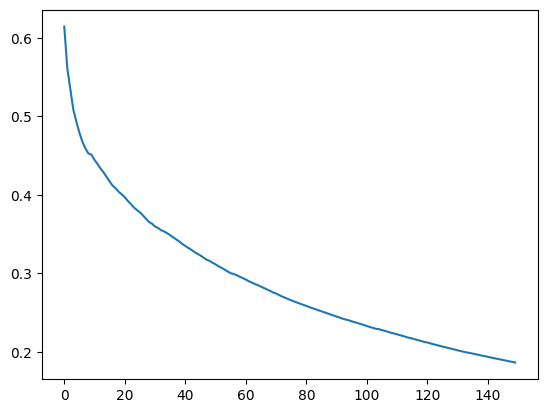

In [228]:
plt.plot(m_g_losses)

In [230]:
m_g_model.save_weights('m_g_model_weights.h5')

In [242]:
# embedded movie dataframe 만들기
embedded_course = user_course_df['course_id'].apply(m_g_model.get_layer('course_embedding'))
embedded_course[0]


<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-0.0593027 ,  0.04875885, -0.0508783 ,  0.06873838, -0.04483264,
        0.05266787, -0.08070861, -0.07853917,  0.07114442, -0.04394163,
        0.06151138, -0.07394468, -0.06580207,  0.04697436,  0.05088966,
       -0.06091103,  0.06096238, -0.03834599,  0.05545437,  0.07434848,
        0.05415248,  0.05805245, -0.04877236,  0.0704589 ,  0.05903074,
        0.04945314, -0.03150611, -0.06436475,  0.04432081,  0.05033467,
       -0.08256852,  0.04631745,  0.06662437,  0.05819404,  0.04427145,
        0.06299341, -0.04217709,  0.07730756,  0.07195079, -0.05282653,
        0.05406117,  0.06271426, -0.0586516 ,  0.0691838 , -0.07075939,
       -0.05324145,  0.05151975, -0.0584849 ,  0.05967528,  0.04526347,
        0.03491888,  0.03494877, -0.05862066,  0.07716908,  0.06792692,
        0.06790035, -0.0215904 , -0.06556588, -0.04508855,  0.07151824,
        0.09604164,  0.05394441,  0.03993671,  0.07498994,  0.03142501,
        0.066763

In [245]:
numpy_array = np.array([tensor.numpy() for tensor in embedded_course])
print(numpy_array)

[[-0.0593027   0.04875885 -0.0508783  ... -0.04584834  0.0605149
  -0.0626293 ]
 [-0.0593027   0.04875885 -0.0508783  ... -0.04584834  0.0605149
  -0.0626293 ]
 [-0.0593027   0.04875885 -0.0508783  ... -0.04584834  0.0605149
  -0.0626293 ]
 ...
 [-0.05726198  0.04355771 -0.062011   ... -0.05908494  0.06003321
  -0.05375248]
 [-0.05726198  0.04355771 -0.062011   ... -0.05908494  0.06003321
  -0.05375248]
 [-0.05726198  0.04355771 -0.062011   ... -0.05908494  0.06003321
  -0.05375248]]


In [247]:
df = pd.DataFrame(numpy_array, columns=[str(i) for i in range(100)])
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.059303,0.048759,-0.050878,0.068738,-0.044833,0.052668,-0.080709,-0.078539,0.071144,-0.043942,...,-0.056955,-0.056265,0.067518,-0.043569,-0.062145,0.055744,-0.045352,-0.045848,0.060515,-0.062629
1,-0.059303,0.048759,-0.050878,0.068738,-0.044833,0.052668,-0.080709,-0.078539,0.071144,-0.043942,...,-0.056955,-0.056265,0.067518,-0.043569,-0.062145,0.055744,-0.045352,-0.045848,0.060515,-0.062629
2,-0.059303,0.048759,-0.050878,0.068738,-0.044833,0.052668,-0.080709,-0.078539,0.071144,-0.043942,...,-0.056955,-0.056265,0.067518,-0.043569,-0.062145,0.055744,-0.045352,-0.045848,0.060515,-0.062629
3,-0.059303,0.048759,-0.050878,0.068738,-0.044833,0.052668,-0.080709,-0.078539,0.071144,-0.043942,...,-0.056955,-0.056265,0.067518,-0.043569,-0.062145,0.055744,-0.045352,-0.045848,0.060515,-0.062629
4,-0.059303,0.048759,-0.050878,0.068738,-0.044833,0.052668,-0.080709,-0.078539,0.071144,-0.043942,...,-0.056955,-0.056265,0.067518,-0.043569,-0.062145,0.055744,-0.045352,-0.045848,0.060515,-0.062629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,-0.057262,0.043558,-0.062011,0.075306,-0.046226,0.060434,-0.083632,-0.059315,0.071085,-0.041067,...,-0.070434,-0.064104,0.065797,-0.049426,-0.083937,0.060331,-0.037777,-0.059085,0.060033,-0.053752
1382,-0.057262,0.043558,-0.062011,0.075306,-0.046226,0.060434,-0.083632,-0.059315,0.071085,-0.041067,...,-0.070434,-0.064104,0.065797,-0.049426,-0.083937,0.060331,-0.037777,-0.059085,0.060033,-0.053752
1383,-0.057262,0.043558,-0.062011,0.075306,-0.046226,0.060434,-0.083632,-0.059315,0.071085,-0.041067,...,-0.070434,-0.064104,0.065797,-0.049426,-0.083937,0.060331,-0.037777,-0.059085,0.060033,-0.053752
1384,-0.057262,0.043558,-0.062011,0.075306,-0.046226,0.060434,-0.083632,-0.059315,0.071085,-0.041067,...,-0.070434,-0.064104,0.065797,-0.049426,-0.083937,0.060331,-0.037777,-0.059085,0.060033,-0.053752


In [248]:
embedded_user = user_course_df['username'].apply(m_g_model.get_layer('user_embedding'))
embedded_user[0]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-0.06836944,  0.01692186, -0.03801873,  0.04983742, -0.00951085,
        0.07428868, -0.0080416 , -0.05263397, -0.02475483, -0.04917365,
       -0.00778847,  0.01736768, -0.05146098,  0.03030398,  0.05908415,
       -0.06861763,  0.03092977,  0.01398337,  0.01473148,  0.0016723 ,
        0.02936692,  0.02253188,  0.01357895,  0.0621583 ,  0.04014874,
        0.02156221,  0.00844649,  0.01258201,  0.00107244,  0.02284623,
       -0.07018108,  0.05985485,  0.06543851,  0.06156316,  0.01559731,
       -0.01132774,  0.00066509,  0.00137299, -0.01389226, -0.06427226,
       -0.00085953,  0.02118652, -0.05029476,  0.07257842, -0.03089495,
       -0.04361692,  0.03332255, -0.01103267,  0.05648107,  0.03543986,
        0.03511299,  0.03789921, -0.07032533,  0.07225665, -0.01004642,
        0.02100173, -0.0635104 , -0.03657239, -0.07395879,  0.02492624,
        0.00343068, -0.00788342,  0.03169391,  0.01806462, -0.01300168,
        0.032980

In [249]:
numpy_array = np.array([tensor.numpy() for tensor in embedded_user])
print(numpy_array)

[[-6.83694407e-02  1.69218592e-02 -3.80187258e-02 ... -4.91628014e-02
   8.49518366e-03 -6.07081354e-02]
 [ 4.63027097e-02  4.76677306e-02 -4.58772294e-02 ... -1.42899975e-02
   2.60307528e-02 -2.72642616e-02]
 [-1.93293951e-02  5.14217950e-02  7.40338437e-05 ...  2.41351221e-03
   6.92851543e-02 -2.47050468e-02]
 ...
 [ 3.58320400e-03  4.04682644e-02 -4.01718393e-02 ... -4.01717797e-02
   1.08037218e-02 -3.84043679e-02]
 [-4.56098691e-02  9.73124802e-02 -5.72756156e-02 ... -3.97138298e-02
   5.50224967e-02 -6.88717291e-02]
 [ 3.33272479e-02  4.65777852e-02 -2.55422723e-02 ...  1.82240121e-02
   4.70219590e-02 -1.09922774e-02]]


In [250]:
df = pd.DataFrame(numpy_array, columns=[str(i) for i in range(100)])
df


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.068369,0.016922,-0.038019,0.049837,-0.009511,0.074289,-0.008042,-0.052634,-0.024755,-0.049174,...,0.018762,-0.038763,0.009796,-0.065051,-0.037933,-0.016210,-0.050016,-0.049163,0.008495,-0.060708
1,0.046303,0.047668,-0.045877,0.015911,0.038982,-0.009479,-0.030444,0.018397,0.028115,-0.026309,...,-0.007615,0.023432,0.019494,-0.049829,0.023983,-0.000912,0.002427,-0.014290,0.026031,-0.027264
2,-0.019329,0.051422,0.000074,-0.023390,-0.021526,0.037085,-0.059928,0.019120,0.015906,-0.073789,...,-0.069354,-0.052289,0.054991,-0.070059,-0.074601,0.012646,0.018105,0.002414,0.069285,-0.024705
3,-0.092741,0.052474,-0.078271,0.032110,-0.077336,0.056073,-0.075300,-0.032641,0.039382,-0.023510,...,-0.046347,-0.072402,0.060083,-0.060549,-0.093985,0.046289,-0.066923,-0.090020,0.076186,-0.070819
4,0.032283,-0.048369,-0.042272,0.010159,-0.034821,-0.004533,-0.005668,-0.039406,0.013125,0.018865,...,-0.014814,0.003160,0.035817,0.013667,0.034853,0.037043,-0.026316,-0.043041,-0.010460,0.034845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,-0.058919,0.057068,-0.041373,0.002979,0.001773,0.017910,-0.031084,0.029219,-0.016453,0.004593,...,-0.006071,-0.024087,0.033377,0.054638,0.014710,0.054306,-0.045233,-0.014419,-0.014444,0.017055
1382,-0.017742,0.007586,-0.058931,0.022630,-0.029249,0.035340,-0.013642,-0.055893,0.067038,-0.059804,...,-0.010559,-0.061291,0.043628,-0.014366,-0.095958,0.067163,-0.061880,-0.033917,0.012008,-0.054293
1383,0.003583,0.040468,-0.040172,-0.020793,0.008320,-0.040378,-0.035351,-0.033400,-0.036742,-0.023071,...,-0.031367,-0.033289,0.014875,0.040769,-0.049603,-0.001859,0.018816,-0.040172,0.010804,-0.038404
1384,-0.045610,0.097312,-0.057276,0.041162,-0.077159,0.026413,-0.065083,-0.022672,0.074231,-0.054895,...,-0.030947,-0.090345,0.066617,-0.043885,-0.075846,0.020654,-0.068159,-0.039714,0.055022,-0.068872
